In [1]:
import atd2022
import torch
import pandas as pd
import numpy as np
from atd_informer.atd_informer_V2 import ATD_Informer_V2
from utils.tools import dotdict
from atd_wrapper_V2 import InformerForcaster_V2
pd.set_option('display.max_columns', None)
from sktime.performance_metrics.forecasting import (
    MeanAbsoluteScaledError,
    MeanSquaredError,
)

In [2]:
import torch
torch.cuda.is_available()

True

In [3]:
torch.cuda.set_device(3) 

# Testing ATD Protocol

In [6]:
truth = atd2022.io.read_csv()

In [7]:
args = dotdict()
args.enc_in = 5200 # encoder input size
args.dec_in = 5200 # decoder input size
args.c_out = 5200 # output size
args.factor = 6 # probsparse attn factor
args.d_model = 1500 # dimension of model
args.n_heads = 18 # num of heads
args.e_layers = 6 # num of encoder layers
args.d_layers = 6 # num of decoder layers
args.d_ff = 3000 # dimension of fcn in model
args.dropout = 0.005 # dropout
args.attn = 'prob' # attention used in encoder, options:[prob, full]
args.embed = 'timeF' # time features encoding, options:[timeF, fixed, learned]
args.activation = 'gelu' # activation
args.distil = True # whether to use distilling in encoder
args.output_attention = True # whether to output attention in ecoder
args.mix = True
args.padding = 0
args.freq = 'w'
args.inverse=False
args.timeenc=1


args.use_gpu=True

#args.cols=1
args.checkpoints = "/scratch/wzong/atd_tmp"



args.seq_len=52
args.label_len=4
args.pred_len=4


args.batch_size = 32
args.learning_rate = 0.001
args.loss = 'mse'
args.lradj = 'type2'
args.use_amp = False

args.itr=1
args.train_epochs=1
args.patience=5

In [8]:
exp = InformerForcaster_V2(args)

In [7]:
exp.fit(truth)

Use GPU: cuda:None
Use GPU: cuda:None
>>>>>>>start training : None_None_ftNone_sl52_ll4_pl4_dm1500_nh18_el6_dl6_df3000_atprob_fc6_ebtimeF_dtTrue_mxTrue_None_0>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1 cost time: 7.084685325622559
Epoch: 1, Steps: 4 | Train Loss: 4626868.5000000
Validation loss decreased (inf --> 4626868.500000).  Saving model ...


In [8]:
test=exp.predict([1,2,3,4])

[[4.1408873 3.9604838 3.1525304 ... 3.5255544 3.0886736 2.363277 ]
 [4.1411686 3.9629896 3.1563063 ... 3.5327258 3.085878  2.3624525]
 [4.1345806 3.961229  3.154509  ... 3.5257068 3.0736692 2.3621225]
 [4.1492567 3.9669366 3.1503239 ... 3.5262194 3.0872438 2.369316 ]]
<class 'numpy.ndarray'>
(4, 5200)


In [9]:
test

Region                  AA                                                    \
Event                   01   02   03   04   05   06   07   08   09   10   11   
2018-02-12/2018-02-18  4.0  4.0  3.0  4.0  4.0  3.0  3.0  3.0  3.0  1.0  3.0   
2018-02-19/2018-02-25  4.0  4.0  3.0  4.0  4.0  3.0  3.0  3.0  3.0  1.0  3.0   
2018-02-26/2018-03-04  4.0  4.0  3.0  4.0  4.0  3.0  3.0  3.0  3.0  1.0  3.0   
2018-03-05/2018-03-11  4.0  4.0  3.0  4.0  4.0  3.0  3.0  3.0  3.0  1.0  3.0   

Region                                                               AC       \
Event                   12   13   14   15   16   17   18   19   20   01   02   
2018-02-12/2018-02-18  3.0  1.0  0.0  0.0  2.0  4.0  2.0  3.0  1.0  3.0  5.0   
2018-02-19/2018-02-25  3.0  1.0  0.0  0.0  2.0  4.0  2.0  3.0  1.0  3.0  5.0   
2018-02-26/2018-03-04  3.0  1.0  0.0  0.0  2.0  4.0  2.0  3.0  1.0  3.0  5.0   
2018-03-05/2018-03-11  3.0  1.0  0.0  0.0  2.0  4.0  2.0  3.0  1.0  3.0  5.0   

Region                                                                        \
Event                   03   04   05   06   07   08   09   10   11   12   13   
2018-02-12/2018-02-18  3.0  3.0  4.0  4.0  4.0  3.0  3.0  3.0  3.0  4.0  3.0   
2018-02-19/2018-02-25  3.0  3.0  4.0  4.0  4.0  3.0  3.0  3.0  3.0  4.0  3.0   
2018-02-26/2018-03-04  3.0  3.0  4.0  4.0  4.0  3.0  3.0  3.0  3.0  4.0  3.0   
2018-03-05/2018-03-11  3.0  3.0  4.0  4.0  4.0  3.0  3.0  3.0  3.0  4.0  3.0   

Region                                                     AE                 \
Event                   14   15   16   17   18   19   20   01   02   03   04   
2018-02-12/2018-02-18  1.0  0.0  2.0  4.0  1.0  4.0  1.0  3.0  4.0  5.0  5.0   
2018-02-19/2018-02-25  1.0  0.0  2.0  4.0  1.0  4.0  1.0  3.0  4.0  5.0  5.0   
2018-02-26/2018-03-04  1.0  0.0  2.0  4.0  1.0  4.0  1.0  3.0  4.0  5.0  5.0   
2018-03-05/2018-03-11  1.0  0.0  2.0  4.0  1.0  4.0  1.0  3.0  4.0  5.0  5.0   

Region                                                                        \
Event                   05   06   07   08   09   10   11   12   13   14   15   
2018-02-12/2018-02-18  3.0  5.0  3.0  4.0  3.0  5.0  4.0  4.0  3.0  4.0  4.0   
2018-02-19/2018-02-25  3.0  5.0  3.0  4.0  3.0  5.0  4.0  4.0  3.0  4.0  4.0   
2018-02-26/2018-03-04  3.0  5.0  3.0  4.0  3.0  5.0  4.0  4.0  3.0  4.0  4.0   
2018-03-05/2018-03-11  3.0  5.0  3.0  4.0  3.0  5.0  4.0  4.0  3.0  4.0  4.0   

Region                                           AF                           \
Event                   16   17   18   19   20   01   02   03   04   05   06   
2018-02-12/2018-02-18  3.0  5.0  4.0  4.0  1.0  4.0  3.0  4.0  4.0  4.0  3.0   
2018-02-19/2018-02-25  3.0  5.0  4.0  4.0  1.0  4.0  3.0  4.0  4.0  4.0  3.0   
2018-02-26/2018-03-04  3.0  5.0  4.0  4.0  1.0  4.0  3.0  4.0  4.0  4.0  3.0   
2018-03-05/2018-03-11  3.0  5.0  4.0  4.0  1.0  4.0  3.0  4.0  4.0  4.0  3.0   

Region                                                                        \
Event                   07   08   09   10   11   12   13   14   15   16   17   
2018-02-12/2018-02-18  5.0  4.0  4.0  3.0  4.0  3.0  4.0  4.0  3.0  4.0  3.0   
2018-02-19/2018-02-25  5.0  4.0  4.0  3.0  4.0  3.0  4.0  4.0  3.0  4.0  3.0   
2018-02-26/2018-03-04  5.0  4.0  4.0  3.0  4.0  3.0  4.0  4.0  3.0  4.0  3.0   
2018-03-05/2018-03-11  5.0  4.0  4.0  3.0  4.0  3.0  4.0  4.0  3.0  4.0  3.0   

Region                                 AG                                     \
Event                   18   19   20   01   02   03   04   05   06   07   08   
2018-02-12/2018-02-18  4.0  4.0  4.0  3.0  4.0  3.0  4.0  5.0  4.0  3.0  4.0   
2018-02-19/2018-02-25  4.0  4.0  4.0  3.0  4.0  3.0  4.0  5.0  4.0  3.0  4.0   
2018-02-26/2018-03-04  4.0  4.0  4.0  3.0  4.0  3.0  4.0  5.0  4.0  3.0  4.0   
2018-03-05/2018-03-11  4.0  4.0  4.0  3.0  4.0  3.0  4.0  5.0  3.0  3.0  4.0   

Region                                                                        \
Event                   09   10   11   12   13   14   15   16   17   18 

# Full Scaled Testing

In [9]:
args = dotdict()
args.enc_in = 5200 # encoder input size
args.dec_in = 5200 # decoder input size
args.c_out = 5200 # output size
args.factor = 6 # probsparse attn factor
args.d_model = 1500 # dimension of model
args.n_heads = 18 # num of heads
args.e_layers = 6 # num of encoder layers
args.d_layers = 6 # num of decoder layers
args.d_ff = 3000 # dimension of fcn in model
args.dropout = 0.005 # dropout
args.attn = 'prob' # attention used in encoder, options:[prob, full]
args.embed = 'timeF' # time features encoding, options:[timeF, fixed, learned]
args.activation = 'gelu' # activation
args.distil = True # whether to use distilling in encoder
args.output_attention = True # whether to output attention in ecoder
args.mix = True
args.padding = 0
args.freq = 'w'
args.inverse=False
args.timeenc=1


args.use_gpu=True

#args.cols=1
args.checkpoints = "/scratch/wzong/atd_tmp"



args.seq_len=52
args.label_len=4
args.pred_len=4


args.batch_size = 40
args.learning_rate = 0.001
args.loss = 'mse'
args.lradj = 'type2'
args.use_amp = False

args.itr=1
args.train_epochs=100
args.patience=5

In [10]:
lispDL = InformerForcaster_V2(args)

In [4]:
from arlpsu_ml import PTSForecaster, make_default_model

tft = PTSForecaster(make_default_model("tft"), verbose=False)  # Evaluate this model.
deepar = PTSForecaster(make_default_model("deepar"), verbose=False)
nbeats = PTSForecaster(make_default_model("nbeats"), verbose=False)

In [10]:
 # Load data
truth = atd2022.io.read_csv()

# Subset the data for the sake of making this fast.
# Remove if you want to run the example on the entire dataset.
# truth = truth.head(108)

# Experiment Parameters
window = 150
num_predict = 4
gap = 0
slide = 1

# Create a dataset `Splitter` object for generating train/test splits
splitter = atd2022.backtest.Splitter(
    truth,
    window,
    num_predict,
    gap,
    slide,
    expanding=True,
) 

In [ ]:
 # Populate a list of models that support the `atd2022.forecasters.Forecaster` protocol
# with which will we generate historical forecasts
models = [
#     lispDL,
    deepar,
    tft,
    nbeats,
    atd2022.forecasters.PredictMeanForecaster(),
    atd2022.forecasters.ExponentiallyWeightedMovingAverage(),
]

# Compute historical forecasts for all models
predictions = [
    atd2022.backtest.historical_forecast(model, splitter, verbose=True)
    for model in models
]

PTSForecaster(model=DeepAREstimator):   0%|          | 0/62 [00:00<?, ?it/s]

PTSForecaster(model=TemporalFusionTransformerEstimator):   0%|          | 0/62 [00:00<?, ?it/s]

Predictions Processed:   0%|          | 0/5 [00:00<?, ?it/s]

Predictions Processed:   0%|          | 0/20 [00:00<?, ?it/s]

,MeanAbsoluteScaledError,MeanSquaredError
PTSForecaster(model=DeepAREstimator),1.148298,68.821351
PTSForecaster(model=TemporalFusionTransformerEstimator),1.033778,64.062992
PTSForecaster(model=NBEATSEstimator),1.054495,67.114660
PredictMeanForecaster(),1.296643,74.351915
ExponentiallyWeightedMovingAverage(span=3),1.134943,69.402254


MeanAbsoluteScaledError  \
model                                              n                            
ExponentiallyWeightedMovingAverage(span=3)         0                 0.958802   
                                                   1                 1.133459   
                                                   2                 1.202900   
                                                   3                 1.244613   
PTSForecaster(model=DeepAREstimator)               0                 0.993271   
                                                   1                 1.148634   
                                                   2                 1.208346   
                                                   3                 1.242942   
PTSForecaster(model=NBEATSEstimator)               0                 0.951903   
                                                   1                 1.050572   
                                                   2                 1.096868   
                                                   3                 1.118636   
PTSForecaster(model=TemporalFusionTransformerEs... 0                 0.937425   
                                                   1                 1.029349   
                                                   2                 1.070720   
                                                   3                 1.097619   
PredictMeanForecaster()                            0                 1.296671   
                                                   1                 1.294141   
                                                   2                 1.298289   
                                                   3                 1.297471   

                                                      MeanSquaredError  
model                                              n                    
ExponentiallyWeightedMovingAverage(span=3)         0         59.704579  
                                                   1         69.217606  
                                                   2         72.713221  
                                                   3         74.648410  
PTSForecaster(model=DeepAREstimator)               0         60.811129  
                                                   1         68.890373  
                                                   2         71.454304  
                                                   3         72.923421  
PTSForecaster(model=NBEATSEstimator)               0         61.765112  
                                                   1         66.796735  
                                                   2         68.979205  
                                                   3         70.248646  
PTSForecaster(model=TemporalFusionTransformerEs... 0         59.410806  
                                                   1         63.964950  
                                                   2         65.699025  
                                                   3         66.670703  
PredictMeanForecaster()                            0         74.303688  
                                                   1         74.277074  
                                                   2         74.414270  
                                                   3         74.272793

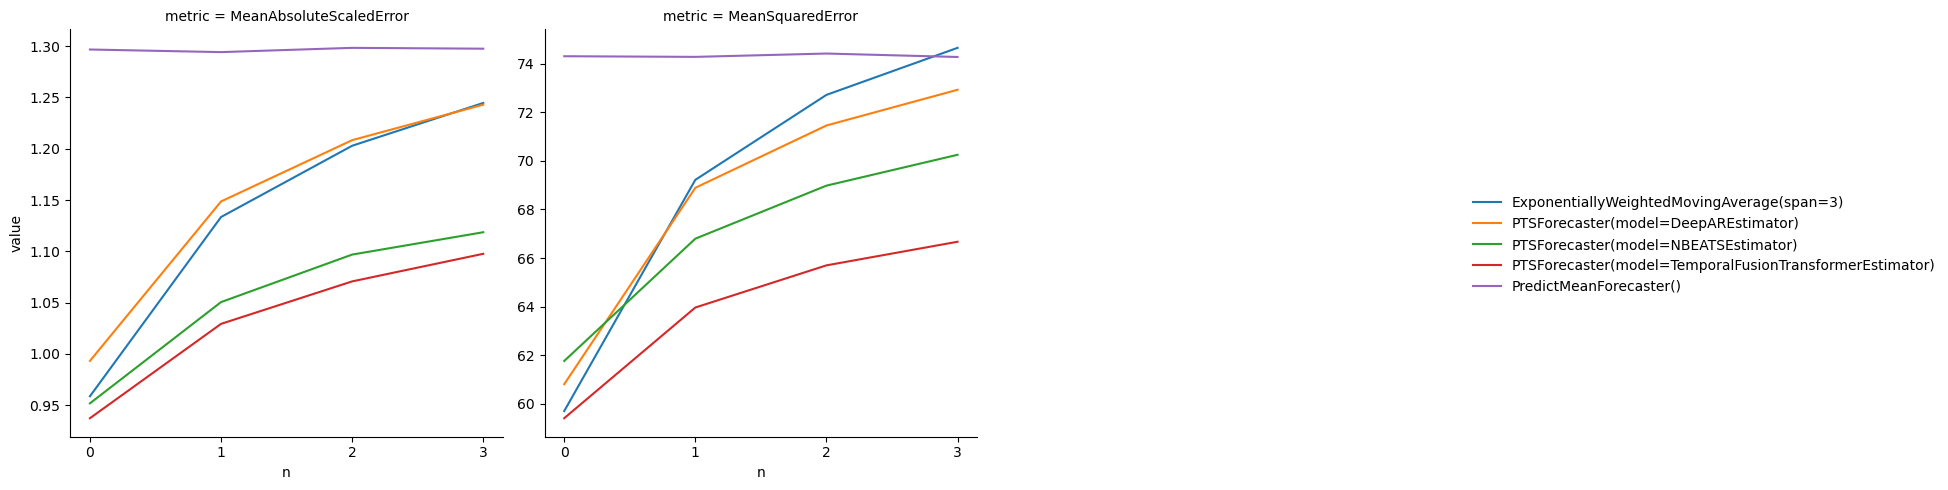

In [9]:
metric_functions = [
    MeanAbsoluteScaledError(),
    MeanSquaredError(square_root=True),
]

metrics_df = atd2022.metrics.compute_metrics(
    truth,
    predictions,
    metric_functions,
    models=models,
    train=truth,
    verbose=True,
)

metrics_n = atd2022.metrics.compute_nstep_metrics(
    truth,
    predictions,
    metric_functions,
    models=models,
    train=truth,
    verbose=True,
)
display(metrics_df)
display(metrics_n)
display(atd2022.viz.plot_nstep_metrics(metrics_n))

In [19]:
import torch
import torch.nn as nn

In [43]:
rnn = nn.LSTM(10, 20, 2)
input = torch.randn(5, 3, 10)
h0 = torch.randn(2, 3, 20)
c0 = torch.randn(2, 3, 20)
output, (hn, cn) = rnn(input, (h0, c0))

In [40]:
input.shape

torch.Size([5, 3, 10])

In [36]:
output.shape

torch.Size([5, 3, 20])

In [37]:
hn.shape

torch.Size([2, 3, 20])

In [38]:
cn.shape

torch.Size([2, 3, 20])